<a href="https://colab.research.google.com/github/atulkr777/covid19/blob/master/covidIndia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Read excel and preprocessing

In [ ]:
df=pd.read_excel("17May.xlsx",parse_dates=['Date'])

df=df.drop(columns=['Time','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)

df.rename(columns=
{'Date':'date','State/UnionTerritory':'state'
,'Cured':'cured','Deaths':'deaths','Confirmed':'confirmed'
},
inplace=True)




In [ ]:
df['active']=df['confirmed']-df['cured']-df['deaths']


df.tail()



,Sno,date,state,cured,deaths,confirmed,active
2029,2030,2020-05-17,Telengana,971,34,1509,504
2030,2031,2020-05-17,Tripura,64,0,167,103
2031,2032,2020-05-17,Uttarakhand,51,1,88,36
2032,2033,2020-05-17,Uttar Pradesh,2441,104,4258,1713
2033,2034,2020-05-17,West Bengal,872,232,2576,1472


visualizing affected states on Indian Map using shape file

In [ ]:
fp="Indian_States.shp"
map_df=gpd.read_file(fp)
map_df.head()


,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


Matching up state names in the df with the state names in the map

In [ ]:
top=df[df['date']==df['date'].max()]
india=top.groupby('state')['confirmed','active','deaths'].sum().reset_index()


india["state"].iloc[0]='Andaman & Nicobar Island'

india["state"].iloc[2]='Arunanchal Pradesh'

india["state"].iloc[7]='Dadara & Nagar Havelli'

india["state"].iloc[6]='Daman & Diu'

india["state"].iloc[13]='Jammu & Kashmir'

india["state"].iloc[8]='NCT of Delhi'

india["state"].iloc[28]='Telangana'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



state wise latest count 

In [ ]:
india




,state,confirmed,active,deaths
0,Andaman & Nicobar Island,33,0,0
1,Andhra Pradesh,2355,953,49
2,Arunanchal Pradesh,1,0,0
3,Assam,92,49,2
4,Bihar,1179,719,7
5,Chandigarh,191,137,3
6,Daman & Diu,67,11,0
7,Dadara & Nagar Havelli,1,1,0
8,NCT of Delhi,9333,5278,129
9,Goa,17,10,0


Merging DF and map

In [ ]:
merged=map_df.set_index("st_nm").join(india.set_index("state"))


Creating figure to plot the state wise count on the map

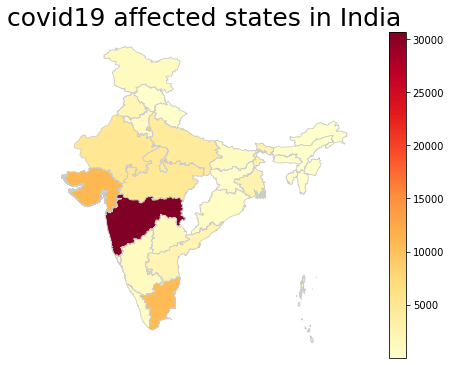

In [ ]:
#create fig

fig,ax=plt.subplots(1,figsize=(10,6))
ax.axis('off')
ax.set_title('covid19 affected states in India',fontdict={'fontsize':'25','fontweight':'3'})


#ploting the figure

merged.plot(column='confirmed',cmap='YlOrRd',linewidth=0.8,ax=ax,edgecolor='0.8',legend=True)



plot of cases per day till date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



          date  confirmed
104 2020-05-13      74281
105 2020-05-14      78003
106 2020-05-15      81970
107 2020-05-16      85710
108 2020-05-17      90637


[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

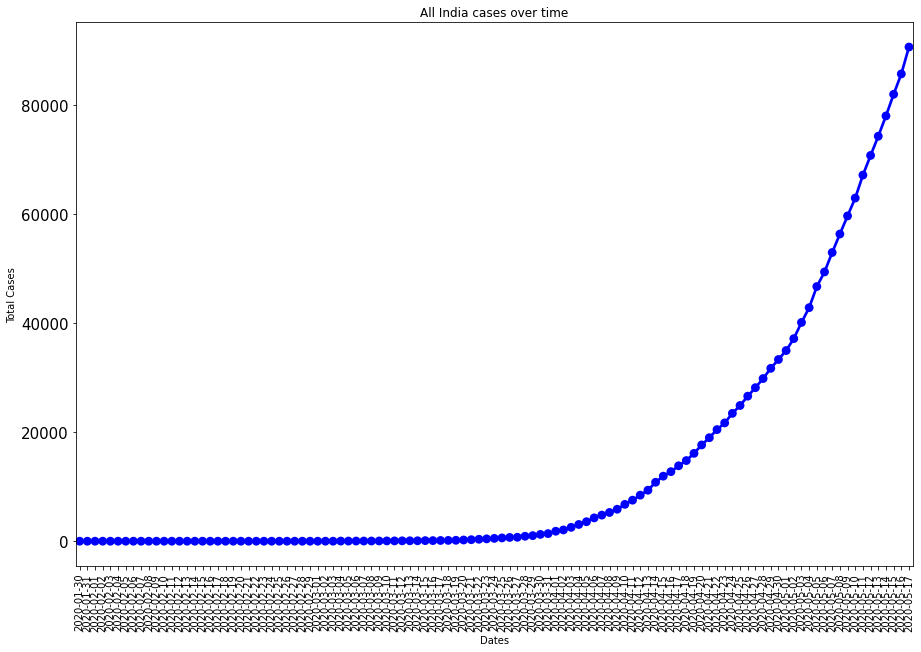

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel("Dates")
plt.ylabel("Total cases")
plt.title("All India cases over time")
total_cases=df.groupby('date')['date','confirmed'].sum().reset_index()
print(total_cases.tail())

#total_cases['date']=pd.to_datetime(total_cases['date'])
#total_cases.sort_values(by=['date'], inplace=True, ascending=True)

ax=sns.pointplot(x=total_cases.date.dt.date,y=total_cases.confirmed,color='b')
ax.set(xlabel='Dates',ylabel='Total Cases')


Grouping data per day basis for timeseries forecasting

In [ ]:

df_per_day=df.groupby("date")[['confirmed','cured','deaths']].sum().reset_index()

df_per_day.tail()

,date,confirmed,cured,deaths
104,2020-05-13,74281,24386,2415
105,2020-05-14,78003,26235,2549
106,2020-05-15,81970,27920,2649
107,2020-05-16,85710,30153,2752
108,2020-05-17,90637,34109,2872


Model Initialization

In [ ]:
total_cases=df_per_day.reset_index()



from fbprophet import Prophet
m=Prophet(interval_width=0.98)


m.add_seasonality(name="monthly",period=30.5,fourier_order=5)


Model Initialization

In [ ]:
confirmed_cases=total_cases[['date','confirmed']]
#cured_cases=total_cases[['date','cured']]

#renaming dataframe

confirmed_cases.rename(columns={"date":"ds","confirmed":"y"},inplace=True)

confirmed_cases.tail()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ds,y
104,2020-05-13,74281
105,2020-05-14,78003
106,2020-05-15,81970
107,2020-05-16,85710
108,2020-05-17,90637


Fitting Model

In [ ]:
m.fit(confirmed_cases)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Making future data frame

In [ ]:
future_date=m.make_future_dataframe(periods=10)

Prediction

In [ ]:
prediction=m.predict(future_date)

Visualizing prediction

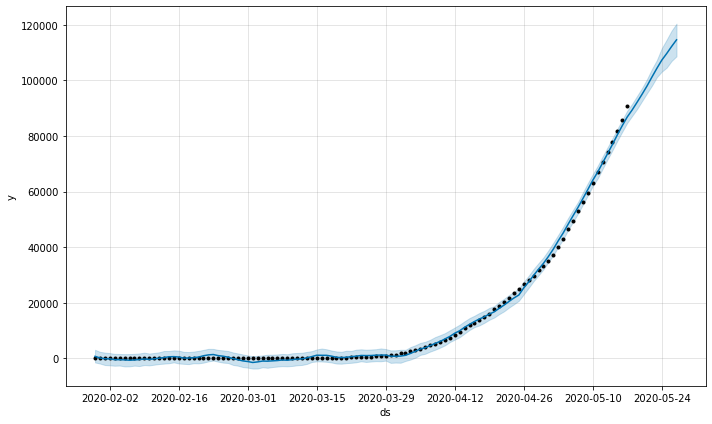

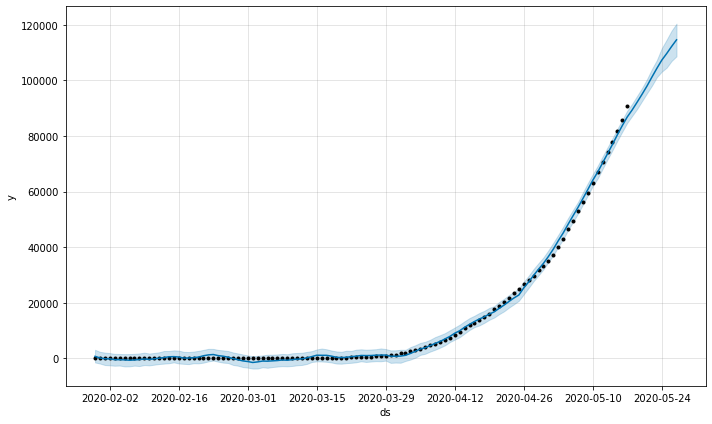

In [ ]:
m.plot(prediction)

Next 10 day forecast

In [ ]:
prediction.tail(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
109,2020-05-18,87870.988304,87240.128128,91584.853010,87613.093494,88096.810280,1514.798379,1514.798379,1514.798379,1575.906970,1575.906970,1575.906970,-61.108591,-61.108591,-61.108591,0.0,0.0,0.0,89385.786682
110,2020-05-19,90763.305093,89710.093350,94426.565813,90036.258902,91357.735458,1400.102189,1400.102189,1400.102189,1401.644725,1401.644725,1401.644725,-1.542535,-1.542535,-1.542535,0.0,0.0,0.0,92163.407282
111,2020-05-20,93655.621881,92558.462174,97243.435140,92449.765094,94664.616021,1352.246798,1352.246798,1352.246798,1368.672254,1368.672254,1368.672254,-16.425456,-16.425456,-16.425456,0.0,0.0,0.0,95007.868679
112,2020-05-21,96547.938670,95357.308285,100429.613072,94697.922066,98230.179684,1418.548372,1418.548372,1418.548372,1528.974320,1528.974320,1528.974320,-110.425947,-110.425947,-110.425947,0.0,0.0,0.0,97966.487042
113,2020-05-22,99440.255459,98078.015309,104054.723396,96982.808644,101606.495735,1747.680386,1747.680386,1747.680386,1776.060016,1776.060016,1776.060016,-28.379630,-28.379630,-28.379630,0.0,0.0,0.0,101187.935845
114,2020-05-23,102332.572248,101149.011186,107273.362534,99288.589887,105023.252789,1975.975382,1975.975382,1975.975382,1932.291684,1932.291684,1932.291684,43.683698,43.683698,43.683698,0.0,0.0,0.0,104308.547630
115,2020-05-24,105224.889037,103142.116466,111556.355066,101617.338284,108651.132537,2050.956075,2050.956075,2050.956075,1876.757613,1876.757613,1876.757613,174.198462,174.198462,174.198462,0.0,0.0,0.0,107275.845111
116,2020-05-25,108117.205826,104601.792924,114655.221928,103881.613392,112363.794671,1546.773649,1546.773649,1546.773649,1607.882240,1607.882240,1607.882240,-61.108591,-61.108591,-61.108591,0.0,0.0,0.0,109663.979474
117,2020-05-26,111009.522614,107000.079533,117907.741709,106159.848735,116042.863526,1199.953581,1199.953581,1199.953581,1201.496117,1201.496117,1201.496117,-1.542535,-1.542535,-1.542535,0.0,0.0,0.0,112209.476196
118,2020-05-27,113901.839403,108680.012152,120426.801293,108383.815893,119781.606530,704.322246,704.322246,704.322246,720.747702,720.747702,720.747702,-16.425456,-16.425456,-16.425456,0.0,0.0,0.0,114606.161649


In [ ]:
prediction[['ds','yhat','yhat_upper','yhat_lower']].tail(10)

,ds,yhat,yhat_upper,yhat_lower
109,2020-05-18,89385.786682,91584.853010,87240.128128
110,2020-05-19,92163.407282,94426.565813,89710.093350
111,2020-05-20,95007.868679,97243.435140,92558.462174
112,2020-05-21,97966.487042,100429.613072,95357.308285
113,2020-05-22,101187.935845,104054.723396,98078.015309
114,2020-05-23,104308.547630,107273.362534,101149.011186
115,2020-05-24,107275.845111,111556.355066,103142.116466
116,2020-05-25,109663.979474,114655.221928,104601.792924
117,2020-05-26,112209.476196,117907.741709,107000.079533
118,2020-05-27,114606.161649,120426.801293,108680.012152


Different trends

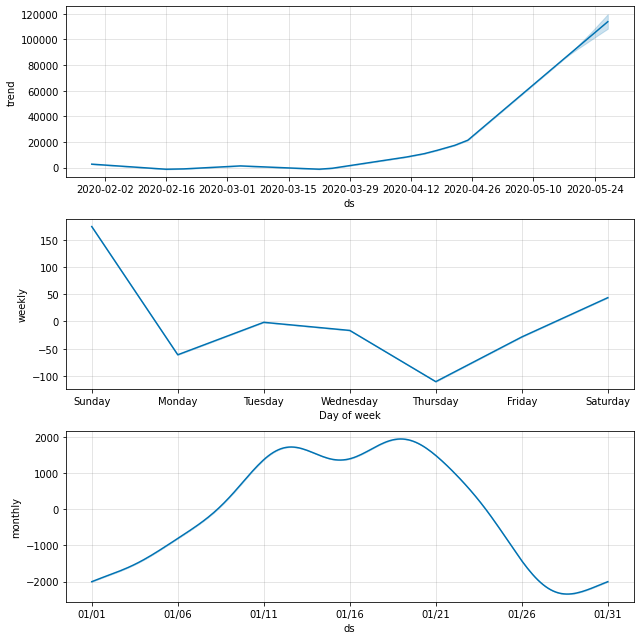

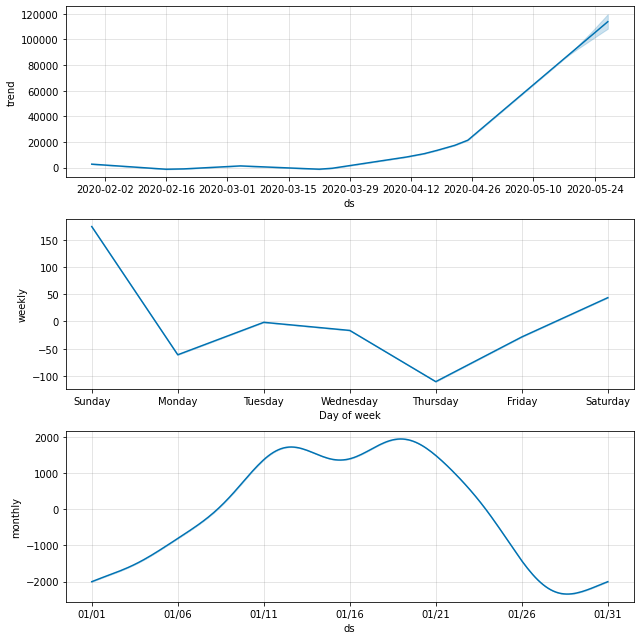

In [ ]:

m.plot_components(prediction)

Different change points within the prediction

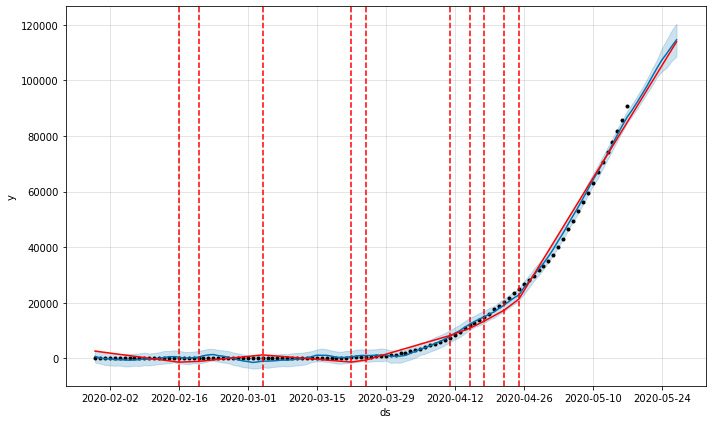

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(prediction)
a = add_changepoints_to_plot(fig.gca(), m, prediction)
